<font color ='teal'>Importing Libraries<font />

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<font color ='teal'>Create a dataframe login_time and load the logins.json file <font />

In [2]:
login_time = pd.read_json('logins.json')
#Print the first five rows of login_time
login_time.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
#Print the shape of login_time
print(login_time.shape)

(93142, 1)


In [4]:
login_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


1. Aggregating the login counts based on 15minute time interval 

In [5]:
login_time.set_index("login_time", inplace = True)
login_time['count'] = 1
login_time.sort_index(inplace = True)
login_time_agg = login_time.resample("15min").sum()

In [6]:
login_time_agg.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [7]:
login_time_agg.tail()

,count
login_time,
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2
1970-04-13 18:30:00,7
1970-04-13 18:45:00,6


This dataframe contains data from January 1st, 1970 to April 13, 1970.

<font color='teal'>2. Visualizing and describing the resulting time series of login counts<font />

<Figure size 1440x720 with 0 Axes>

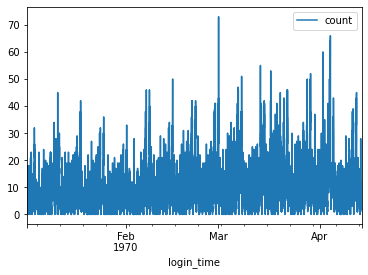

In [8]:
plt.figure(figsize=(20,10))
login_time_agg.plot()

This graph is not very clear. It might have some patterns. So better we can observe it monthwise.

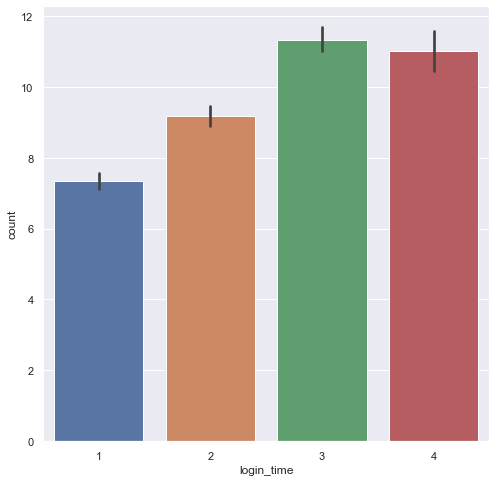

In [9]:
sns.set(rc ={"figure.figsize":(8,8)})
sns.barplot(x=login_time_agg.index.month, y=login_time_agg['count'], data=login_time_agg)

We can observe the count is higher in March, 1970 and lower in January, 1970

# January Observations

In [10]:
January_count =login_time_agg[login_time_agg.index.month == 1]
print(January_count.head())
print(January_count.tail())

                     count
login_time                
1970-01-01 20:00:00      2
1970-01-01 20:15:00      6
1970-01-01 20:30:00      9
1970-01-01 20:45:00      7
1970-01-01 21:00:00      1
                     count
login_time                
1970-01-31 22:45:00     16
1970-01-31 23:00:00     10
1970-01-31 23:15:00      9
1970-01-31 23:30:00      7
1970-01-31 23:45:00     14


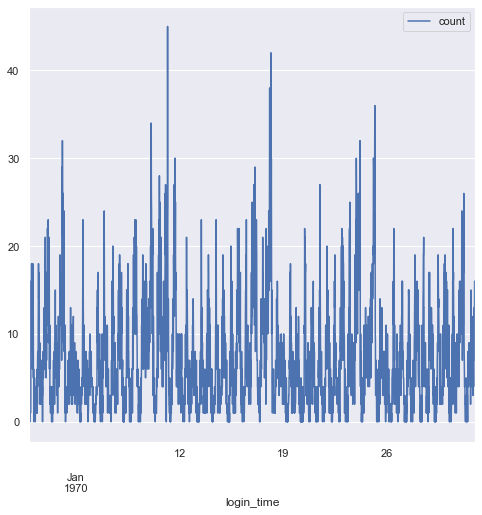

In [11]:
January_count.plot()

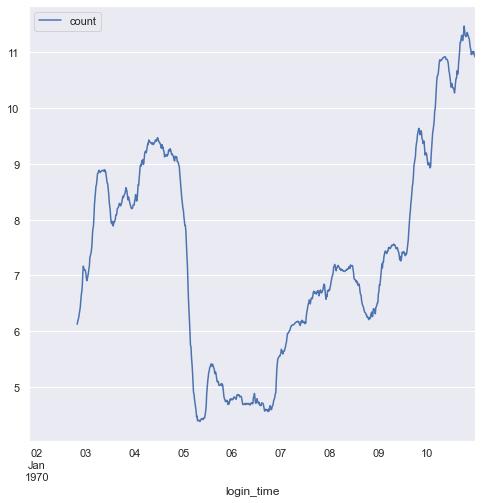

In [12]:
January_count.loc['1970-01-01':'1970-01-10'].rolling(window=96).mean().plot()

If we consider first 10 days of January month, we could observe the logins are more in weekend than in weekdays.

# WEEKEND

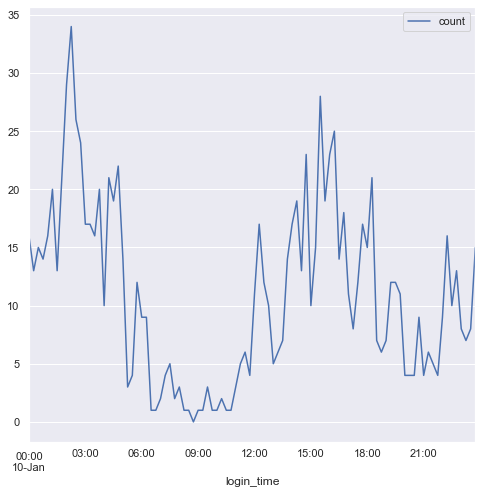

In [13]:
one_day = January_count[January_count.index.day == 10]
one_day.plot()

If we consider a day in weekend  the demand is high in midnight that is between 12 am and 3 am,3 pm to 5 pm.

# WEEKDAY 

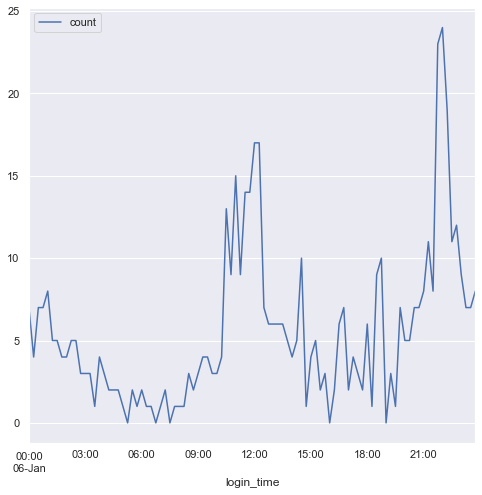

In [14]:
one_day = January_count[January_count.index.day == 6]
one_day.plot()

If we consider a day in weekdays, the demand is high twelve noon and in midnight

# February Observations

In [15]:
February_count =login_time_agg[login_time_agg.index.month == 2]
print(February_count.head())
print(February_count.tail())

                     count
login_time                
1970-02-01 00:00:00     12
1970-02-01 00:15:00     11
1970-02-01 00:30:00     17
1970-02-01 00:45:00     15
1970-02-01 01:00:00     16
                     count
login_time                
1970-02-28 22:45:00     20
1970-02-28 23:00:00     23
1970-02-28 23:15:00     27
1970-02-28 23:30:00     17
1970-02-28 23:45:00     18


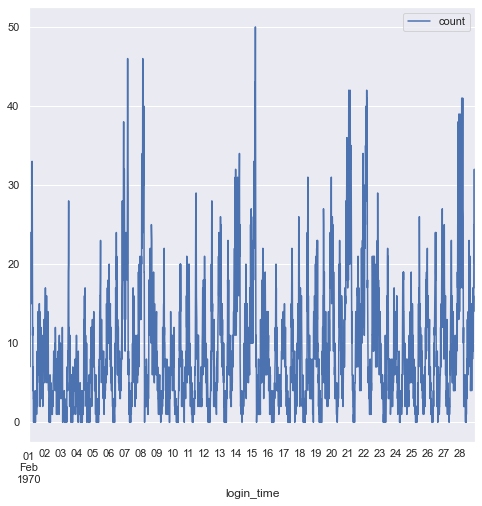

In [16]:
February_count.plot()

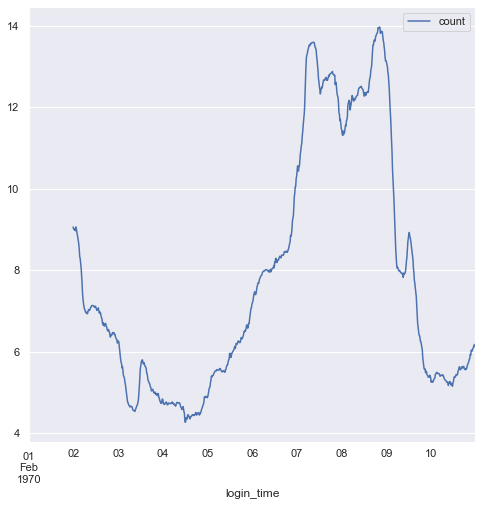

In [17]:
February_count.loc['1970-02-01':'1970-02-10'].rolling(window=96).mean().plot()

# WEEKEND

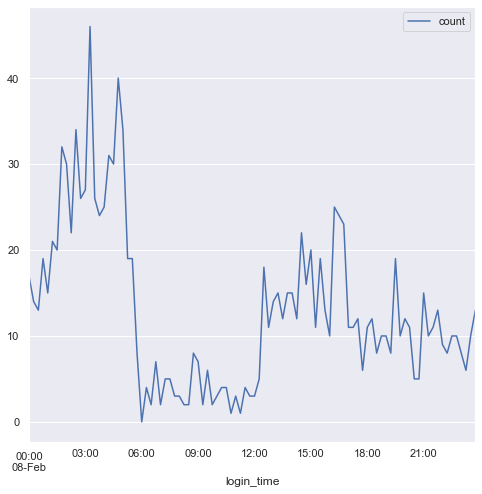

In [18]:
one_day = February_count[February_count.index.day == 8]
one_day.plot()

The demand is very high in midnight that is around 12 am to 3 am if considered a day in february

# WEEKDAY

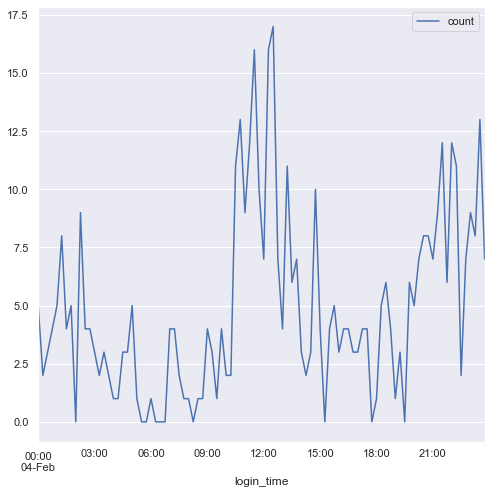

In [19]:
one_day = February_count[February_count.index.day == 4]
one_day.plot()

The demand is high in noon and also in midnight

# March Observations

In [20]:
March_count =login_time_agg[login_time_agg.index.month == 3]
print(March_count.head())
print(March_count.tail())

                     count
login_time                
1970-03-01 00:00:00     16
1970-03-01 00:15:00     19
1970-03-01 00:30:00     17
1970-03-01 00:45:00     12
1970-03-01 01:00:00     20
                     count
login_time                
1970-03-31 22:45:00     21
1970-03-31 23:00:00     24
1970-03-31 23:15:00     23
1970-03-31 23:30:00     23
1970-03-31 23:45:00     14


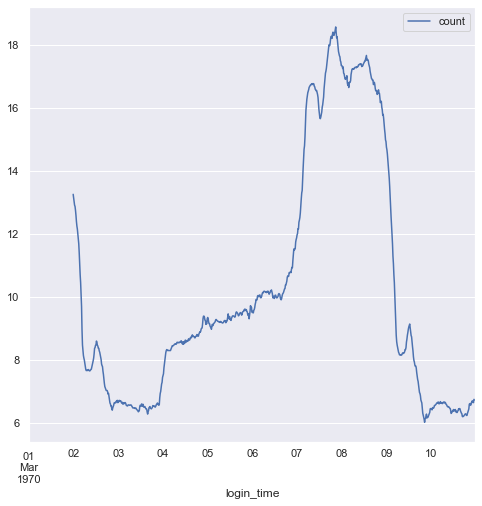

In [21]:
March_count.loc['1970-03-01':'1970-03-10'].rolling(window=96).mean().plot()

# WEEKEND

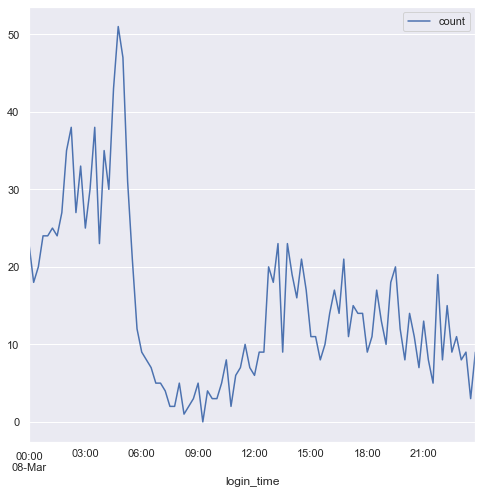

In [22]:
one_day = March_count[March_count.index.day == 8]
one_day.plot()

Same observation as in February, demand is high in midnight

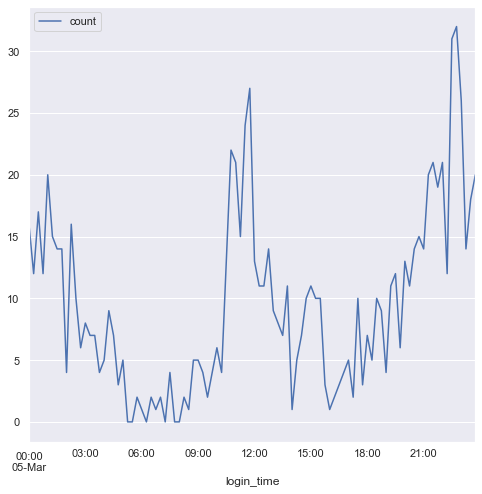

In [23]:
one_day = March_count[March_count.index.day == 5]
one_day.plot()

The demand is high on noon around 11pm to 3pm

# April Obeservations

In [24]:
April_count =login_time_agg[login_time_agg.index.month == 4]
print(April_count.head())
print(April_count.tail())

                     count
login_time                
1970-04-01 00:00:00     15
1970-04-01 00:15:00     11
1970-04-01 00:30:00     14
1970-04-01 00:45:00     19
1970-04-01 01:00:00     16
                     count
login_time                
1970-04-13 17:45:00      5
1970-04-13 18:00:00      5
1970-04-13 18:15:00      2
1970-04-13 18:30:00      7
1970-04-13 18:45:00      6


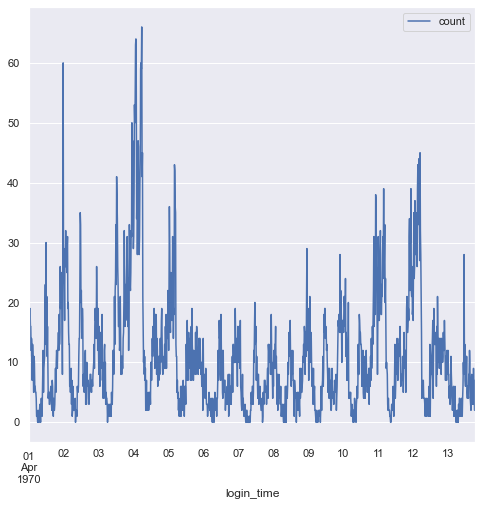

In [25]:
April_count.plot()

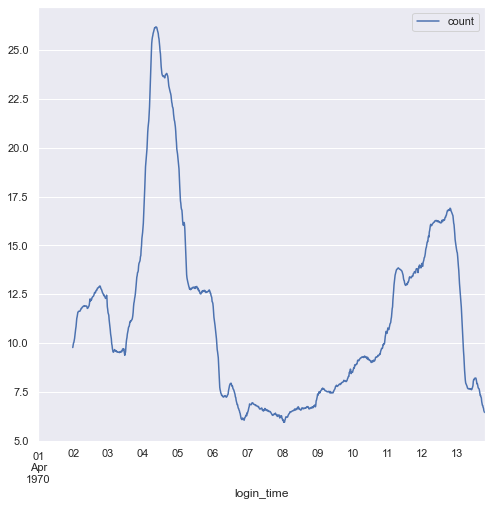

In [26]:
April_count.loc['1970-04-01':'1970-04-13'].rolling(window=96).mean().plot()

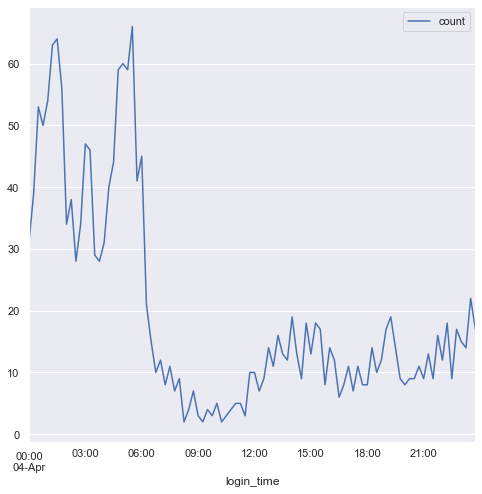

In [27]:
one_day = April_count[April_count.index.day == 4]
one_day.plot()

The demand is high in twelve midday and in midnight if considered one day in April.

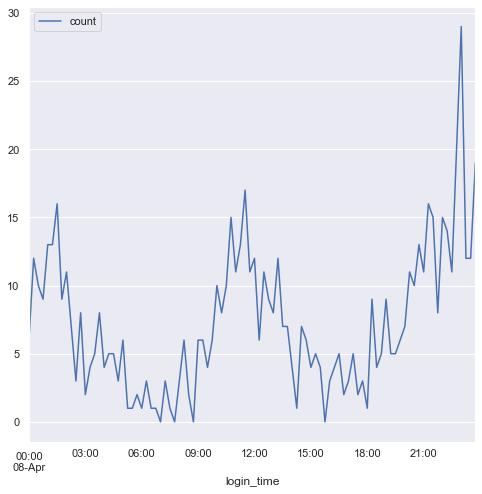

In [28]:
one_day = April_count[April_count.index.day == 8]
one_day.plot()

The logins are more in midnoon and midnight

***Conclusion***

* Demand is high in weekends than in weekdays.
* And demand is high in both midday and midnight in both weekends and weekdays.
